<a href="https://colab.research.google.com/github/fadhil-code/Analytical-Methods-in-Telecommunications-Networks-2021/blob/main/final_kol2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Языковое моделирование**

Языковая модель - это статистическая модель, которая фиксирует соответствующие лингвистические особенности корпуса, на котором она обучается. На базовом уровне он должен фиксировать частотное распределение букв и слов. Более продвинутая языковая модель должна улавливать синтаксические и грамматические зависимости, такие как согласованность и перегибание, а также семантические свойства, например, какие слова могут встречаться в данном контексте. Языковые модели обычно используются для двух основных задач: скоринга и генерации. При скоринге языковая модель дает оценку вероятности определенного слова, встречающегося в данном контексте. При генерации образец модели из изученного дистрибутива генерирует поддельный, но правдоподобно звучащий текст.


# **Описание установленной системы и инструкция по ее установке и настройке**

Чтобы применить языковое моделирование к обнаружению плагиата, вы можете обучить языковую модель на кучке текста, который, по вашему мнению, люди могут скопировать.
Я собрал информацию из предыдущего абзаца (1) об иракском международном игроке Юнисе Махмуде с большинства международных сайтов, таких как Википедия, социальные сети и спортивные сайты, и сохранил информацию в виде текста (myfile.txt)
  Этот агрегированный набор данных будет нашими обучающими данными, которые мы будем использовать для построения языковой модели, которая фиксирует статистические характеристики текста. Более высокий балл означает, что работа более предсказуема на основе данных обучения и представляет более высокую вероятность плагиата.
существует два разных подхода к языковому моделированию - модели N-грамм и RNN. Целью было создание поддельного текста определенного стиля. Один из этих методов, модель N-грамм, оказывается простой, но эффективной реализацией для обнаружения плагиата.

Когда у нас есть обученная модель, она поддерживает различные операции, такие как оценка слова с учетом контекста или генерация слова из изученного распределения вероятностей. Пришло время оценить нашу информацию.
Прочтите в предварительном процессе данные тестирования («myfile.txt»).
Токенизируйте данные тестирования.
Для каждого слова в тексте вызовите model.score () для этого слова с предыдущими словами N-1 в качестве аргумента контекста.
Это дает нам список оценок от 0 до 1, по одному на слово, где более высокий балл представляет более высокую вероятность того, что данное слово было плагиатом. 


# визуализация
Для легкого определения с одного взгляда на систему, был ли украден текст и сколько
Я представил файлы как изображение тепловой карты, где каждый пиксель соответствует оценке одного слова. Это позволяет нам быстро определить, вероятен ли плагиат и какие части текста, скорее всего, будут плагиатом. Визуализация информации таким образом более полезна, чем просмотр набора числовых оценок или сводной статистики всех оценок.
Я попробовал разные способы визуализации этих данных и придумал следующий метод:
•	Отображать K слов в строке (я использовал K = 8). Ширина тепловой карты в пикселях. Затем рассчитайте высоту (количество слов в данных тестирования, деленное на K).
•	Из-за небольшого размера набора данных и проблем с интерполяцией существует некоторая неопределенность в присвоенных оценках, поэтому я применил к ним сглаживание по Гауссу.
•	Измените форму массива оценок в прямоугольник из K столбцов и строк высоты. Это требует добавления нулевого отступа, чтобы обеспечить правильный размер массива.
•	Используйте Plotly Heatmap, чтобы отобразить изображение с использованием выбранной вами шкалы цветов.
•	Отобразите K слов текста в виде галочки на оси Y рядом с соответствующей строкой тепловой карты для удобного параллельного сравнения. Отрегулируйте данные при наведении так, чтобы каждый пиксель отображал соответствующее слово при наведении.


# бегать
чтобы запустить наш код, мы должны установить некоторые важные библиотеки

In [ ]:
pip install --upgrade nltk
nltk.download('punkt')

# теперь вы можете запустить полный код:

In [12]:
import re
import nltk 
from nltk.util import ngrams, pad_sequence, everygrams
from nltk.tokenize import word_tokenize
from nltk.lm import MLE, WittenBellInterpolated
import numpy as np
import plotly.graph_objects as go
from scipy.ndimage import gaussian_filter

# Training data file
train_data_file = "mytext.txt"

# read training data
with open(train_data_file) as f:
    train_text = f.read().lower()

# apply preprocessing (remove text inside square and curly brackets and rem punc)
train_text = re.sub(r"\[.*\]|\{.*\}", "", train_text)
train_text = re.sub(r'[^\w\s]', "", train_text)

# set ngram number
n = 4

# pad the text and tokenize
training_data = list(pad_sequence(word_tokenize(train_text), n,pad_left=True, left_pad_symbol="<s>"))

# generate ngrams
ngrams = list(everygrams(training_data, max_len=n))
print("Number of ngrams:", len(ngrams))

# build ngram language models
model = WittenBellInterpolated(n)
model.fit([ngrams], vocabulary_text=training_data)
print(model.vocab)

# testing data file
test_data_file = "myfile.txt"

# Read testing data
with open(test_data_file) as f:
    test_text = f.read().lower()
test_text = re.sub(r'[^\w\s]', "", test_text)

# Tokenize and pad the text
testing_data = list(pad_sequence(word_tokenize(test_text), n, 
                                 pad_left=True,
                                 left_pad_symbol="<s>"))
print("Length of test data:", len(testing_data))

# assign scores
scores = []
for i, item in enumerate(testing_data[n-1:]):
    s = model.score(item, testing_data[i:i+n-1])
    scores.append(s)

scores_np = np.array(scores)

# set width and height
width = 8
height = np.ceil(len(testing_data)/width).astype("int32")
print("Width, Height:", width, ",", height)

# copy scores to rectangular blank array
a = np.zeros(width*height)
a[:len(scores_np)] = scores_np
diff = len(a) - len(scores_np)

# apply gaussian smoothing for aesthetics
a = gaussian_filter(a, sigma=1.0)

# reshape to fit rectangle
a = a.reshape(-1, width)

# format labels
labels = [" ".join(testing_data[i:i+width]) for i in range(n-1, len(testing_data), width)]
labels_individual = [x.split() for x in labels]
labels_individual[-1] += [""]*diff
labels = [f"{x:60.60}" for x in labels]

# create heatmap
fig = go.Figure(data=go.Heatmap(
                z=a, x0=0, dx=1,
                y=labels, zmin=0, zmax=1,
                customdata=labels_individual,
                hovertemplate='%{customdata} <br><b>Score:%{z:.3f}<extra></extra>',
                colorscale="burg"))
fig.update_layout({"height":height*28, "width":1000, "font":{"family":"Courier New"}})
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

Number of ngrams: 1366
<Vocabulary with cutoff=1 unk_label='<UNK>' and 205 items>
Length of test data: 1887
Width, Height: 8 , 236


# результаты проверки заимствований и анализа:
Чтобы проверить этот подход, я обучил модель обнаружения плагиата в статье в Википедии для информации об игроках Юнеса Махмуда (https://ru.wikipedia.org/wiki/%D0%AE%D0%BD%D0%B8%D1%81_%D0%9C%D0%B0%D1%85%D0%BC%D1%83%D0%B4).

Что касается собранной мной информации, я сравнил две заявки, одна из которых скопирована с небольшими изменениями из Википедии, а другая пришла из совершенно другого источника и посвящена той же теме.
 
 
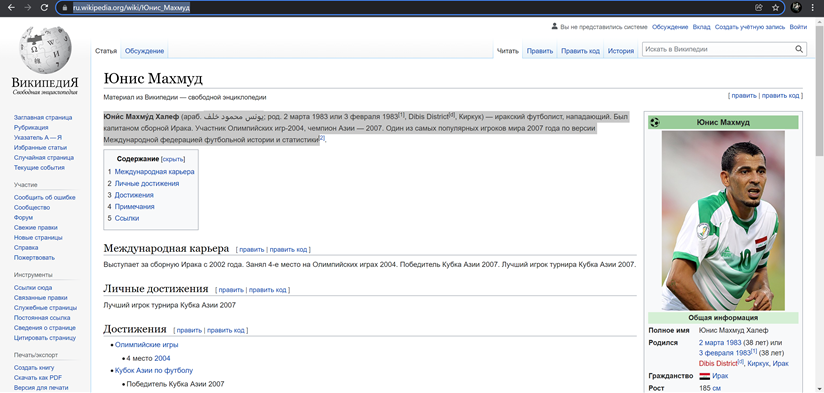

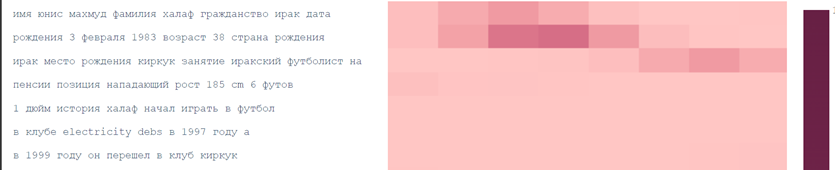

Другой образец был взят с веб-сайта (www.youm7.com) для проверки, и результаты были такими, как показано на изображении ниже

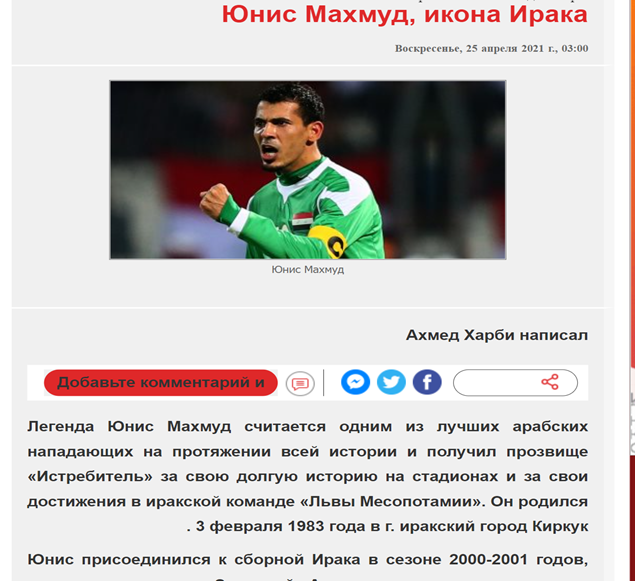

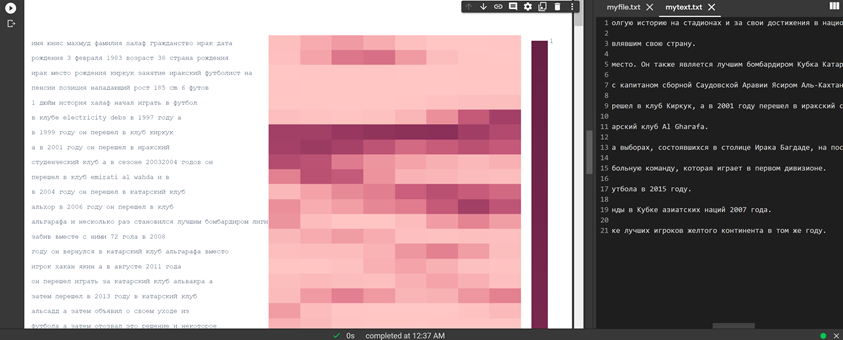
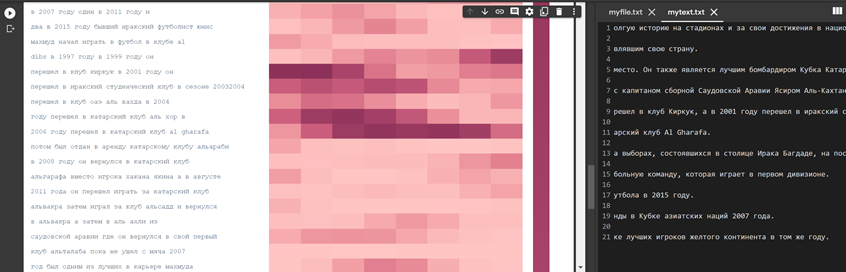

Все мы знаем, что компьютер хорошо справляется с числами, поэтому для вычисления сходства между двумя текстовыми документами необработанные текстовые данные преобразуются в векторы => массивы чисел, а затем мы будем использовать вектор базовых знаний для вычисления сходство между ними.
Чтобы быть более точным в нашей командной работе, я сделал простую функцию для вычисления сходства между файлами, и результаты отображаются в числах.


In [16]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

student_files = [doc for doc in os.listdir() if doc.endswith('.txt')]
student_notes = [open(_file, encoding='utf-8').read()
                 for _file in student_files]

def vectorize(Text): return TfidfVectorizer().fit_transform(Text).toarray()
def similarity(doc1, doc2): return cosine_similarity([doc1, doc2])
vectors = vectorize(student_notes)
s_vectors = list(zip(student_files, vectors))
plagiarism_results = set()
def check_plagiarism():
    global s_vectors
    for student_a, text_vector_a in s_vectors:
        new_vectors = s_vectors.copy()
        current_index = new_vectors.index((student_a, text_vector_a))
        del new_vectors[current_index]
        for student_b, text_vector_b in new_vectors:
            sim_score = similarity(text_vector_a, text_vector_b)[0][1]
            student_pair = sorted((student_a, student_b))
            score = (student_pair[0], student_pair[1], sim_score)
            plagiarism_results.add(score)
    return plagiarism_results
for data in check_plagiarism():
    print(data)

('myfile.txt', 'mytext.txt', 0.5352596753543917)
